# Abordagem de Múltiplos Arquivos e de Gráficos

## Aluno: Rafhael de Oliveira Martins


# 1 - Entendimento do Negócio
## Análises:
* Caracterização dos hóspedes (proporção de homens e mulheres, distribuição de idade e quantidade de dias de hospedagem); 
* Comparação entre a nota do hotel e a quantidade de hóspedes;

## Responda as seguintes perguntas (no notebook):
* Há indícios de que uma superlotação do hotel ocasionou uma menor nota?
* Em geral, quem oferece as piores notas para o hotel, homens ou mulheres?
* Os hóspedes que ofereceram as melhores notas, ficaram hospedados quantos dias, em média?
* Qual a faixa etária dos hóspedes que ficam mais tempo no hotel?

## Use o seguinte parâmetro para faixa etária:
* 18 a 20 anos;
* 21 a 30 anos;
* 31 a 40 anos;
* 41 a 50 anos;
* 51 a 60 anos;
* 60 anos ou mais.

# 2 - Entendimento dos dados

In [1]:
# O glob é uma biblioteca para coletar e manipular o endereço de pastas no computador
import glob
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Apresentas os dados no notebook.
%matplotlib inline

# Definindo estilo para os gráficos.
sns.set_style("darkgrid")

# Tamanho da imagem.
plt.rcParams['figure.figsize'] = (10,6)

# Parametros do Pandas, limitando a quantidade máxima e a largura das colunas.
pd.set_option('max_columns', 120)
pd.set_option('max_colwidth', 5000)

A função *map()* do Python aplica uma função em cada um dos itens de um conjunto iterável (*lista, por exemplo*) e tem como retorno um item iterável (*como uma lista*). Um exemplo prático:

In [2]:
# Agrupando arquivos e lendo os dados. 
dados = pd.concat(map(pd.read_csv, glob.glob(os.path.join('aula', "*.csv"))))
dados.info(memory_usage='deep')
# memory_usage='deep' informa a quantidade de memória usada.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4732 entries, 0 to 0
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   dataPesquisa    4732 non-null   object
 1   sexo            4732 non-null   object
 2   idade           4732 non-null   int64 
 3   tempoEstadia    4732 non-null   int64 
 4   notaHospedagem  4732 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 725.5 KB


In [3]:
# Primeiros dados.
dados.head()

,dataPesquisa,sexo,idade,tempoEstadia,notaHospedagem
0,2020-06-19,M,35,5,3
0,2020-10-19,F,41,10,3
0,2020-02-04,M,54,5,2
0,2020-07-22,F,60,9,3
0,2020-03-30,F,36,9,5


In [4]:
# Últimos dados.
dados.tail()

,dataPesquisa,sexo,idade,tempoEstadia,notaHospedagem
0,2020-03-19,M,46,4,2
0,2020-05-09,F,25,2,3
0,2020-01-31,M,27,4,3
0,2020-01-25,M,35,10,3
0,2020-09-25,F,55,11,2


# 3 - Preparação dos dados

In [5]:
# Convertendo a coluna de data da pesquisa para o tipo "datetime"
dados['dataPesquisa'] = pd.to_datetime(dados['dataPesquisa'], format="%Y-%m-%d")
dados.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4732 entries, 0 to 0
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   dataPesquisa    4732 non-null   datetime64[ns]
 1   sexo            4732 non-null   object        
 2   idade           4732 non-null   int64         
 3   tempoEstadia    4732 non-null   int64         
 4   notaHospedagem  4732 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 452.9 KB


In [6]:
# Proporção por sexo.
dados['sexo'].value_counts()

M    2383
F    2349
Name: sexo, dtype: int64

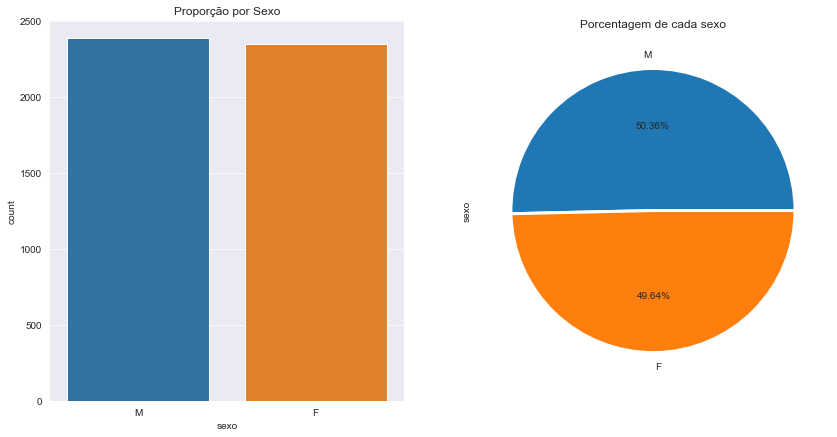

In [7]:
# Gero um gráfico básico para proporção de sexo.
fig, axs = plt.subplots(1,2,figsize=(14,7))
sns.countplot(x='sexo',data=dados,ax=axs[0])
axs[0].set_title("Proporção por Sexo")

dados['sexo'].value_counts().plot(x=None,y=None, kind='pie', ax=axs[1], autopct='%1.2f%%', 
                                  wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' })
axs[1].set_title("Porcentagem de cada sexo")
plt.show()

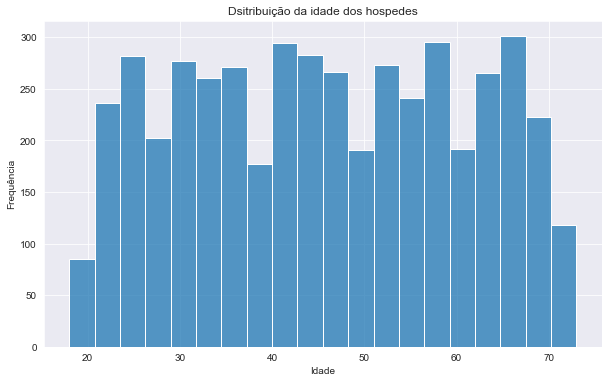

In [8]:
# Distribuição das idades.
sns.histplot(dados['idade'], bins=20)
plt.title('Dsitribuição da idade dos hospedes')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()

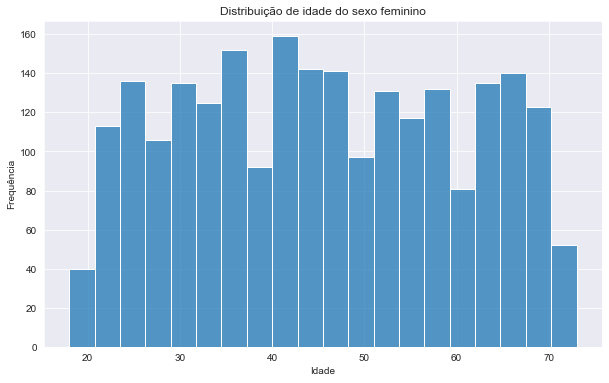

In [9]:
# Separando dados do sexo feminino.
feminino = dados.loc[dados['sexo'] == 'F']

sns.histplot(feminino['idade'], bins=20)
plt.title('Distribuição de idade do sexo feminino')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()

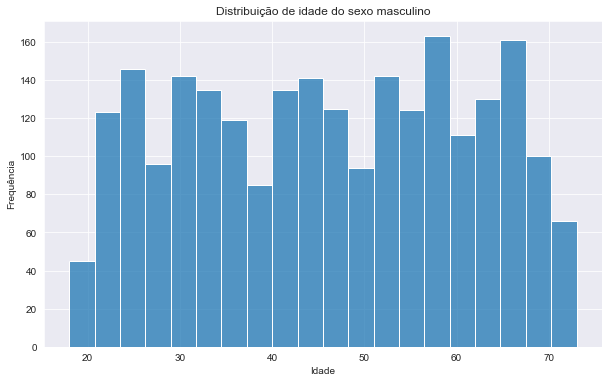

In [10]:
# Separando dados do sexo masculino.
masculino = dados.loc[dados['sexo'] == 'M']

sns.histplot(masculino['idade'], bins=20)
plt.title('Distribuição de idade do sexo masculino')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()

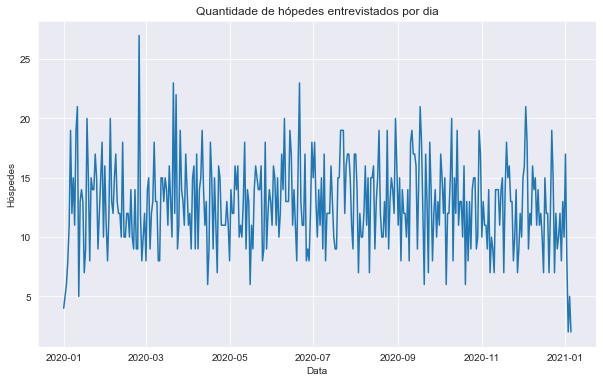

In [11]:
# Gráfico da quantidade por dia de hospedagem
plt.plot(dados.groupby(by=['dataPesquisa']).size())
plt.title('Quantidade de hópedes entrevistados por dia')
plt.ylabel('Hóspedes')
plt.xlabel('Data')
plt.show()

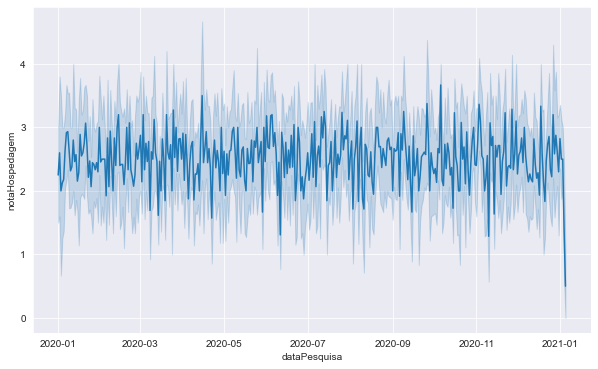

In [12]:
# Gráfico de comparação entre a nota do hotel e a quantidade de hóspedes
plt.figsize=(18,7)
sns.lineplot(data=dados, x='dataPesquisa', y='notaHospedagem', style_order='whitegrid')
plt.show()

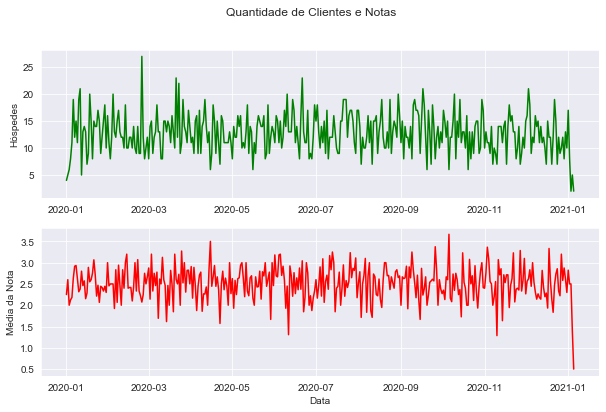

In [13]:
# Gráfico de comparação entre a nota média do hotel e a quantidade de hóspedes
mediaNota = dados.groupby(by=['dataPesquisa']).mean().reset_index()
mediaNota = mediaNota.set_index('dataPesquisa')
mediaNota = mediaNota['notaHospedagem']

fig, (ax1, ax2) = plt.subplots(2)
fig.suptitle('Quantidade de Clientes e Notas')
ax1.plot(dados.groupby(by=['dataPesquisa']).size(), 'g-', label='Hóspedes')
ax1.set_ylabel('Hóspedes')

ax2.plot(mediaNota, 'r-', label='Nota Média')
ax2.set_ylabel('Média da Nota')
ax2.set_xlabel('Data')

plt.show()

# 4 - Perguntas

### 4.1 - Há indícios de que uma superlotação do hotel ocasionou uma menor nota?

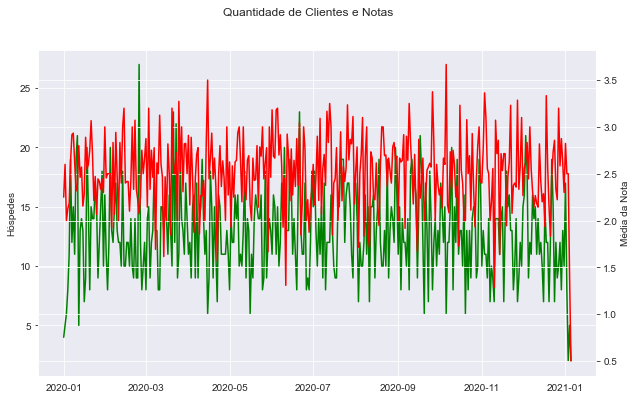

In [14]:
## Gráfico de comparação entre a nota média do hotel e a quantidade de hóspedes
fig, ax1 = plt.subplots()
fig.suptitle('Quantidade de Clientes e Notas')
fig.figsize=(20,20)
ax1.plot(dados.groupby(by=['dataPesquisa']).size(), 'g-', label='Hóspedes')
ax1.set_ylabel('Hóspedes')

ax2 = ax1.twinx() 
ax2.plot(mediaNota, 'r-', label='Nota Média')
ax2.set_ylabel('Média da Nota')
ax2.set_xlabel('Data')
plt.show()

Uma relevante parcela das notas indicam que quanto mais hóspedes a nota é menor e quanto menos hóspedes a nota é maior. Podemos pensar em questões de atendimento, quanto maior o número de clientes, alguns serviços podem demorar mais que outros pela lotação do estabelicimento. Mas também como pode-se verificar no gráfico acima, tem-se notas altas com uma quantida alta de hóspedes, mas em parcela menor nesta observação. Sendo assim, pode-se afirmar que a lotação pode ocasionar nas notas serem menores.

### 4.2 - Em geral, quem oferece as piores notas para o hotel, homens ou mulheres?

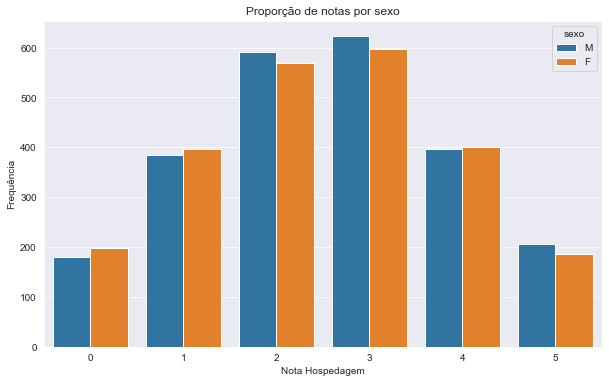

In [15]:
# Gráfico da proporção de notas por sexo.
sns.countplot(x ='notaHospedagem', hue='sexo' , data = dados)
plt.title('Proporção de notas por sexo')
plt.xlabel('Nota Hospedagem')
plt.ylabel('Frequência')
plt.show()

De acordo com o gráfico que vemos acima, pode-se afirmar que as piores notas geralmente é fornecida por hóspedes do sexo feminino. Vemos que das notas de 0 a 1 hóspedes do sexo feminino deram mais notas nestas escalas. Notas entre 2 e 5 hóspedes do sexo feminino forneceram uma menor quantidade de notas nestas escalas. Com exceção da nota 4 em que hóspedes do sexo feminino forneceram uma quantidade de nota em uma parcela de diferença pequena, maior do que hóspedes do sexo masculino. 

### 4.3 - Os hóspedes que ofereceram as melhores notas, ficaram hospedados quantos dias, em média?

In [16]:
# Filtrando base por notas acima da média total.
notasMaioresMedia = dados.loc[dados['notaHospedagem'] > dados['notaHospedagem'].mean()].reset_index()
notasMaioresMedia

,index,dataPesquisa,sexo,idade,tempoEstadia,notaHospedagem
0,0,2020-06-19,M,35,5,3
1,0,2020-10-19,F,41,10,3
2,0,2020-07-22,F,60,9,3
3,0,2020-03-30,F,36,9,5
4,0,2020-06-17,F,50,5,3
...,...,...,...,...,...,...
2406,0,2020-01-17,F,45,6,3
2407,0,2020-12-12,F,44,7,3
2408,0,2020-05-09,F,25,2,3
2409,0,2020-01-31,M,27,4,3


In [17]:
# Distribuição do tempo de hospedagem.
notasMaioresMedia['tempoEstadia'].describe()

count    2411.000000
mean        5.934467
std         2.576115
min         1.000000
25%         4.000000
50%         6.000000
75%         8.000000
max        11.000000
Name: tempoEstadia, dtype: float64

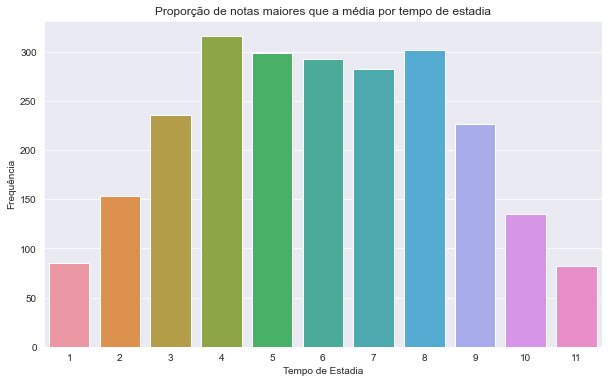

In [18]:
# Gerando gráfico da distribuição do tempo de hospedagem por frequeência e notas acima da média total.
sns.countplot(x='tempoEstadia', data=notasMaioresMedia)
plt.title('Proporção de notas maiores que a média por tempo de estadia')
plt.xlabel('Tempo de Estadia')
plt.ylabel('Frequência')
plt.show()

Pode-se verificar que o tempo de estadia de hóspedes com notas acima da média total da base está entre 5 e 6 dias. Vemos também com o gráfico abaixo em que há todas as notas em todos os valores de tempo de estadia, ficando complicado infromar com o gráfico de dispersão a relação entre notas e tempo de estadia. 

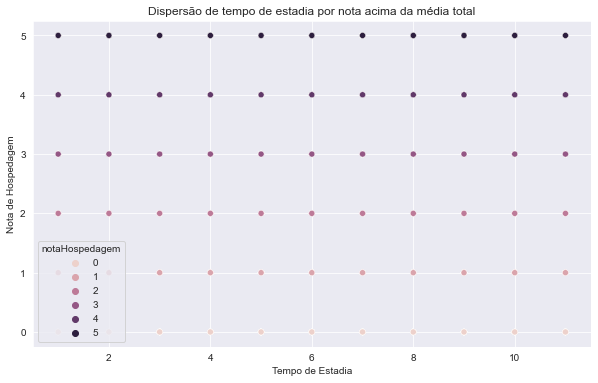

In [19]:
# Gerando gráfico de dispersão do tempo de hospedagem por notas acima da média total.
sns.scatterplot(data=dados, x="tempoEstadia", y="notaHospedagem", hue="notaHospedagem")
plt.title('Dispersão de tempo de estadia por nota acima da média total')
plt.xlabel('Tempo de Estadia')
plt.ylabel('Nota de Hospedagem')
plt.show()

In [22]:
# Agrupando por sexo e nota de hospedagem.
dados.groupby(by=['sexo', 'notaHospedagem']).count()

dataPesquisa  idade  tempoEstadia
sexo notaHospedagem                                   
F    0                        199    199           199
     1                        396    396           396
     2                        569    569           569
     3                        598    598           598
     4                        400    400           400
     5                        187    187           187
M    0                        180    180           180
     1                        385    385           385
     2                        592    592           592
     3                        623    623           623
     4                        397    397           397
     5                        206    206           206

In [23]:
# Agrupando por sexo e tempo de estadia.
dados.groupby(by=['sexo', 'tempoEstadia']).count()

dataPesquisa  idade  notaHospedagem
sexo tempoEstadia                                     
F    1                       76     76              76
     2                      127    127             127
     3                      203    203             203
     4                      331    331             331
     5                      285    285             285
     6                      294    294             294
     7                      284    284             284
     8                      291    291             291
     9                      232    232             232
     10                     139    139             139
     11                      87     87              87
M    1                       79     79              79
     2                      152    152             152
     3                      226    226             226
     4                      282    282             282
     5                      305    305             305
     6                      296    296             296
     7                      292    292             292
     8                      317    317             317
     9                      226    226             226
     10                     141    141             141
     11                      67     67              67

### 4.4 - Qual a faixa etária dos hóspedes que ficam mais tempo no hotel?

In [24]:
# Filtrando base por tempo de estadia acima da média total.
tempoEstadiaMaioresMedia = dados.loc[dados['tempoEstadia'] > dados['tempoEstadia'].mean()].reset_index()
tempoEstadiaMaioresMedia

,index,dataPesquisa,sexo,idade,tempoEstadia,notaHospedagem
0,0,2020-10-19,F,41,10,3
1,0,2020-07-22,F,60,9,3
2,0,2020-03-30,F,36,9,5
3,0,2020-12-12,M,21,10,0
4,0,2020-02-11,M,58,9,1
...,...,...,...,...,...,...
2071,0,2020-06-03,M,44,8,1
2072,0,2020-08-07,M,41,7,1
2073,0,2020-12-12,F,44,7,3
2074,0,2020-01-25,M,35,10,3


In [25]:
# Gerando faixa etária e incluindo coluna da mesma na base de dados.
cortes = [10, 20, 30, 40, 50, 60, np.inf]
faixas = ['18 a 20 anos', '21 a 30 anos', '31 a 40 anos', '41 a 50 anos', '51 a 60 anos', '61 anos ou mais']

tempoEstadiaMaioresMedia['faixaEtaria'] = pd.cut(tempoEstadiaMaioresMedia['idade'], cortes, labels=faixas)
tempoEstadiaMaioresMedia

,index,dataPesquisa,sexo,idade,tempoEstadia,notaHospedagem,faixaEtaria
0,0,2020-10-19,F,41,10,3,41 a 50 anos
1,0,2020-07-22,F,60,9,3,51 a 60 anos
2,0,2020-03-30,F,36,9,5,31 a 40 anos
3,0,2020-12-12,M,21,10,0,21 a 30 anos
4,0,2020-02-11,M,58,9,1,51 a 60 anos
...,...,...,...,...,...,...,...
2071,0,2020-06-03,M,44,8,1,41 a 50 anos
2072,0,2020-08-07,M,41,7,1,41 a 50 anos
2073,0,2020-12-12,F,44,7,3,41 a 50 anos
2074,0,2020-01-25,M,35,10,3,31 a 40 anos


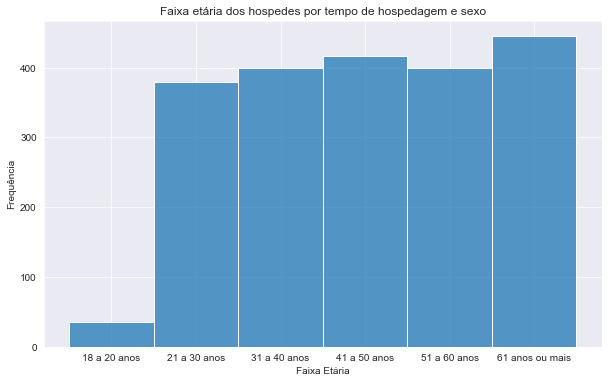

In [27]:
# Gráfico da distribuição da faixa etária dos hospedes com mais tempo de hospedagem.
sns.histplot(tempoEstadiaMaioresMedia['faixaEtaria'], bins=20)
plt.title('Faixa etária dos hospedes por tempo de hospedagem e sexo')
plt.xlabel('Faixa Etária')
plt.ylabel('Frequência')
plt.show()

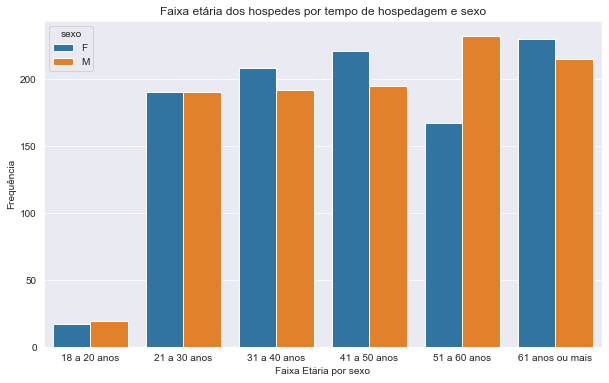

In [28]:
# Gráfico da distribuição da faixa etária dos hospedes com mais tempo de hospedagem e sexo.
sns.countplot(x ='faixaEtaria', hue='sexo' , data = tempoEstadiaMaioresMedia)
plt.title('Faixa etária dos hospedes por tempo de hospedagem e sexo')
plt.xlabel('Faixa Etária por sexo')
plt.ylabel('Frequência')
plt.show()

In [29]:
# Agrupando por sexo e faixa etária.
tempoEstadiaMaioresMedia.groupby(by=['sexo', 'faixaEtaria']).count()

index  dataPesquisa  idade  tempoEstadia  notaHospedagem
sexo faixaEtaria                                                              
F    18 a 20 anos        17            17     17            17              17
     21 a 30 anos       190           190    190           190             190
     31 a 40 anos       208           208    208           208             208
     41 a 50 anos       221           221    221           221             221
     51 a 60 anos       167           167    167           167             167
     61 anos ou mais    230           230    230           230             230
M    18 a 20 anos        19            19     19            19              19
     21 a 30 anos       190           190    190           190             190
     31 a 40 anos       192           192    192           192             192
     41 a 50 anos       195           195    195           195             195
     51 a 60 anos       232           232    232           232             232
     61 anos ou mais    215           215    215           215             215

Acima vemos dois gráficos com a distribuição da quantidade de hóspedes que permaneceram mais tempo no hotel por sua faixa etária respectivamente e sexo.

No primeiro gráfico vemos a distribuição da faixa etária dos hóspedes, concluímos com este, que hóspedes acima de 61 anos ou mais, permanecem mais tempo hospedados no hotel e hóspedes entre 18 e 20 anos são os que menos permanecem no hotel.

No segundo gráfico e com o auxílio da tabela acima também, podemos verificar a distribuição da faixa etária dos hóspedes por sexo, compreende-se que hóspedes do sexo feminino são maioria em que permanecem mais tempo no hotel em relação aos hóspedes do sexo masculino na maior parte da faixa etária das idades. Com exceção da faixa etária de 51 a 60 anos em que hóspedes do sexo masculino são em maior quantidade do que hóspedes do sexo feminino.

# 5 - Conclusão
A partir desta análisa, entende-se que quanto maior a lotação no hotel a nota média dos hóspedes cai respectivamente, tendo como premissa para está afirmação os serviços oferecidos no atendimento dos hóspedes pode demorar um pouco a mais ou a menos em relação a uma quantidade de hóspedes no hotel. Como também o tempo médio de permanencia dos hóspedes no hotel está entre 5 e 6 dias e a nota média entre 2 e 3 pontos. E por fim hóspedes do sexo feminino são maioria no hotel em relação a quantidade de hóspedes do sexo masculino.